In [108]:
import numpy as np
import matplotlib.pylab as plt

In [109]:
x = np.array([
[-1,-2,-1],
[0,  0, 0],
[1,  2, 1]
])

In [110]:
y = x.T

In [151]:
from PIL import Image
image = np.array(Image.open('image2.png').convert('L'))
image = image/np.max(image)

In [132]:
Gx = np.zeros((image.shape[0], image.shape[1]))
Gy = np.zeros((image.shape[0], image.shape[1]))
G = np.zeros((image.shape[0], image.shape[1]))


for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
        Gx[i, j] = np.sum(np.multiply(image[i-1:i+2,j-1:j+2], x))
        Gy[i, j] = np.sum(np.multiply(image[i-1:i+2,j-1:j+2], y))
        
        # Total gradient
        G[i, j] = np.sqrt(Gx[i, j]**2 + Gy[i, j]**2)

In [133]:
G = G/np.max(G)

In [154]:
fimage = image.flatten()

In [135]:
fG = G.flatten()

In [136]:
np.round(G)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

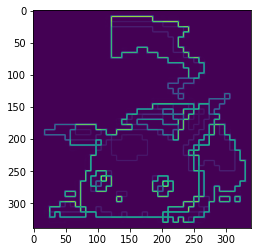

In [137]:
plt.imshow(G)

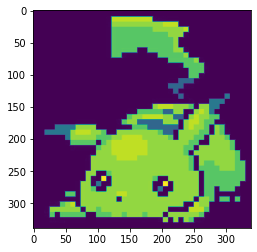

In [138]:
plt.imshow(image)

In [139]:
300*300

90000

In [150]:
400*400/80

2000.0

In [8]:
from matplotlib import animation

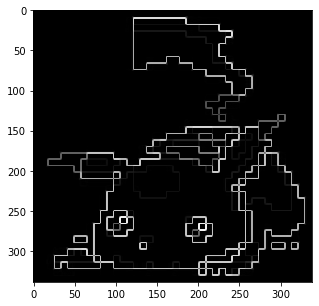

In [155]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
pic = ax.imshow(np.zeros(image.shape), interpolation='none', aspect='auto', vmin=0, vmax=1, cmap="gray")

# initialization function: plot the background of each frame
def init():
    pic.set_array(np.zeros(image.shape))
    return [pic]

# animation function.  This is called sequentially
def animate(i):
    i = i*80s
    pic.set_array(np.concatenate((fG[:i], fimage[i:])).reshape(image.shape))
    return [pic]

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, blit=True)

anim.save('basic_animation.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

plt.show()